In [1]:
#Import libraries
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import time

In [2]:
#Load signal file
sig_file = uproot.open("user.calpert.mc16_13TeV.311423.MGPy8EG_A14NNPDF23_NNPDF31ME_HSS_LLP_mH600_mS150_lthigh.032123_trees.root/user.calpert.311423.e7357_e5984_s3234_r10201_r10210_p4696.32829947._000001.trees.root:trees_DV_")

In [6]:
#Display all elements
def dp(branch):
    for i, value in enumerate(branch):
        print(branch[i])

In [7]:
#Display first 10 elements
def dp10(branch):
    for i, value in enumerate(branch[1:10]):
        print(branch[i])

In [8]:
#Display first 100 elements
def dp100(branch):
    for i, value in enumerate(branch[1:100]):
        print(branch[i])

In [113]:
#Calculate ratio of events that pass cut 
def pctpass(branch1, branch2):
    ratio = (ak.count_nonzero(branch1))/ak.count(branch2)
    print(ratio)

In [4]:
jet_pT=sig_file['jet_pT'].array()
jet_logRatio=sig_file['jet_logRatio'].array() #correct? Check jet_E, jet_EMScale, jet_ET, jet_EMF
jet_JVT=sig_file['jet_jvt'].array() #correct? Check jet_passJVT, 

(array([6.73065e+05, 2.47760e+04, 1.79700e+03, 4.47000e+02, 1.27000e+02,
        4.50000e+01, 2.00000e+01, 1.00000e+01, 0.00000e+00, 3.00000e+00]),
 array([1.86815357e-03, 2.01403156e+02, 4.02804445e+02, 6.04205733e+02,
        8.05607021e+02, 1.00700831e+03, 1.20840960e+03, 1.40981089e+03,
        1.61121217e+03, 1.81261346e+03, 2.01401475e+03]),
 <BarContainer object of 10 artists>)

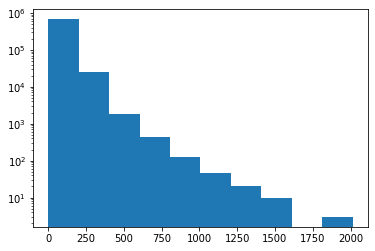

In [41]:
plt.hist(ak.flatten(jet_pT), log=True)

(array([ 59736.,      0.,      0.,      0., 552073.,  87754.,      0.,
             0.,      0.,    727.]),
 array([-999. , -799.2, -599.4, -399.6, -199.8,    0. ,  199.8,  399.6,
         599.4,  799.2,  999. ]),
 <BarContainer object of 10 artists>)

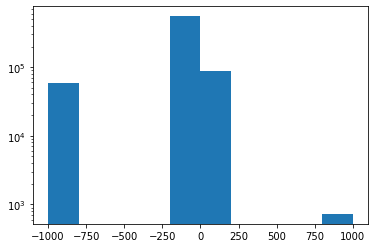

In [42]:
plt.hist(ak.flatten(jet_logRatio), log=True)

In [51]:
ak.any(jet_JVT == 1)

True

(array([362021., 109633.,  41145.,  22494.,  13707.,  11418.,   9168.,
         10594.,  13901., 106209.]),
 array([-0.1 ,  0.01,  0.12,  0.23,  0.34,  0.45,  0.56,  0.67,  0.78,
         0.89,  1.  ]),
 <BarContainer object of 10 artists>)

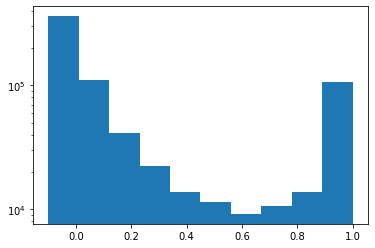

In [43]:
plt.hist(ak.flatten(jet_JVT), log=True)

In [33]:
#Count total number of jets in sample
total_jets = ak.count(jet_pT)
total_jets

700290

In [12]:
jet_cut1= (jet_pT > 30) 

In [15]:
#Check pct of jets that pass jet_pT
pctpass(jet_cut1, jet_pT)

0.2235331077125191


In [20]:
jet_cut2= (jet_logRatio < 0.5)

In [22]:
#Check pct of jets that pass jet_pT
pctpass(jet_cut2, jet_logRatio)

0.9586828313984207


In [106]:
jet_cut3= ((jet_JVT > 0.59) & (jet_pT < 60)) | ((jet_JVT == jet_JVT) & (jet_pT >= 60))   

In [107]:
#Check pct of jets that pass jet_pT
pctpass(jet_cut3, jet_JVT)

0.2802224792585929

In [74]:
jet_finalCut = jet_cut1 & jet_cut2 & jet_cut3

In [75]:
#Check pct of jets that pass jet_finalCut
passfraction = pctpass(jet_finalCut, jet_pT)
passfraction

0.13895957389081667

In [76]:
#Leaves us with total number of jets that pass. ~ 24839 jets
passfraction * total_jets

97312.00000000001

In [102]:
#How many jets pass per event
jet_pass = ak.count_nonzero(jet_finalCut, axis=1)

(array([ 8324., 12966., 12855.,  8702.,  4417.,  1883.,   606.,   187.,
           42.,    18.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

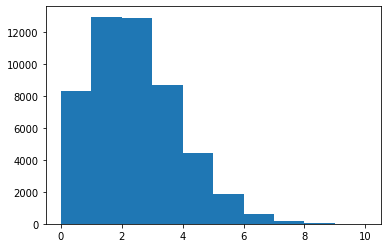

In [104]:
#Plot histogram to show how may jets pass per event
plt.hist(jet_pass, bins = ak.max(jet_pass))

In [115]:
#How many events have at least 2 jets that pass
jet_pass_greater_than_two = jet_pass[jet_pass >= 2]
ak.count(jet_pass_greater_than_two)

28710